In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# fetching pre-processed data
final_data_frame = pd.read_csv('Z:\projects\ez_money\pre_processed_data\GBPJPY_M30.csv')
final_data_frame = final_data_frame.drop('Unnamed: 0', axis=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
scaler.fit(final_data_frame)
normalised_df = scaler.transform(final_data_frame)

In [19]:
x = normalised_df[:, :-1]
y = normalised_df[:, -1] 

In [53]:
timesteps = 1
x_test = np.array(x).reshape(x.shape[0], x.shape[1], timesteps)


In [54]:
x_test.shape

(200000, 3, 1)

In [50]:
y_test = np.array(y).reshape(y.shape[0], 1, timesteps)

In [61]:
y_test.shape

(200000, 1, 1)

In [38]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense
from sklearn.metrics import mean_absolute_error

In [35]:
model = keras.models.load_model('Z:\\projects\\ez_money\\models\\200_ema_30m.h5')

In [75]:
y_pred = model.predict(x_test)

6250/6250 [==============================] - 24s 4ms/step


In [76]:
yp = y_pred

In [77]:
yt = np.array(y_test).reshape(y_test.shape[0], y_test.shape[2])

In [55]:
score = model.evaluate(x_test[:50000], y_test[:50000], verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1908845901489258
Test accuracy: 0.7173600196838379


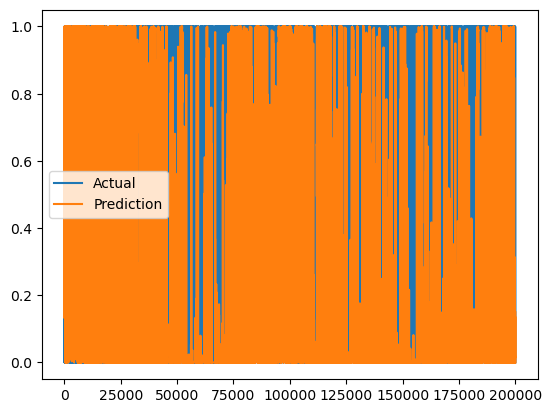

In [78]:
plt.plot(yt, label='Actual')
plt.plot(yp, label='Prediction')
plt.legend()
plt.show()